# HateXplain Dataset Analysis

This notebook analyzes the HateXplain dataset from Hugging Face, which provides annotated data for hate speech and offensive content detection.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Set style for visualizations
plt.style.use('default')
sns.set_theme()

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Load Dataset and Examine Structure

In [3]:
# Load HateXplain dataset
dataset = load_dataset("hatexplain")

# Examine the first example in detail
example = dataset['train'][0]
print("Dataset structure example:")
for key, value in example.items():
    print(f"\n{key}:")
    print(value)
    print(f"Type: {type(value)}")

Dataset structure example:

id:
23107796_gab
Type: <class 'str'>

annotators:
{'label': [0, 2, 2], 'annotator_id': [203, 204, 233], 'target': [['Hindu', 'Islam'], ['Hindu', 'Islam'], ['Hindu', 'Islam', 'Other']]}
Type: <class 'dict'>

rationales:
[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Type: <class 'list'>

post_tokens:
['u', 'really', 'think', 'i', 'would', 'not', 'have', 'been', 'raped', 'by', 'feral', 'hindu', 'or', 'muslim', 'back', 'in', 'india', 'or', 'bangladesh', 'and', 'a', 'neo', 'nazi', 'would', 'rape', 'me', 'as', 'well', 'just', 'to', 'see', 'me', 'cry']
Type: <class 'list'>


In [4]:
type(dataset)

datasets.dataset_dict.DatasetDict

## 2. Process and Analyze Data

In [5]:
import ast
from collections import Counter

df = pd.DataFrame(dataset['train'])
print(df.shape)
def get_most_common_label(row):

    if isinstance(row, str):
        row = ast.literal_eval(row)

    labels = row['label']
    label_counts = Counter(labels)
    return label_counts.most_common(1)[0][0]  # most frequent label

df['majority_label'] = df['annotators'].apply(get_most_common_label)

df['message'] = df['post_tokens'].apply(lambda tokens: ' '.join(tokens))
df = df.drop(columns=['annotators', 'post_tokens', 'rationales'])

print("\nFirst few rows of processed data:")
print(df.head())

print("\nLabel distribution:")
print(df['majority_label'].value_counts())

(15383, 4)

First few rows of processed data:
                            id  majority_label  \
0                 23107796_gab               2   
1                  9995600_gab               2   
2  1227920812235051008_twitter               2   
3  1204931715778543624_twitter               2   
4  1179102559241244672_twitter               2   

                                             message  
0  u really think i would not have been raped by ...  
1  the uk has threatened to return radioactive wa...  
2  if english is not imposition then hindi is als...  
3  no liberal congratulated hindu refugees post c...  
4  he said bro even your texts sound redneck what...  

Label distribution:
majority_label
1    6251
0    4748
2    4384
Name: count, dtype: int64


In [6]:
df.isnull().sum()

id                0
majority_label    0
message           0
dtype: int64

In [7]:
df['majority_label'].unique()

array([2, 1, 0])

## 3. Label Distribution Analysis

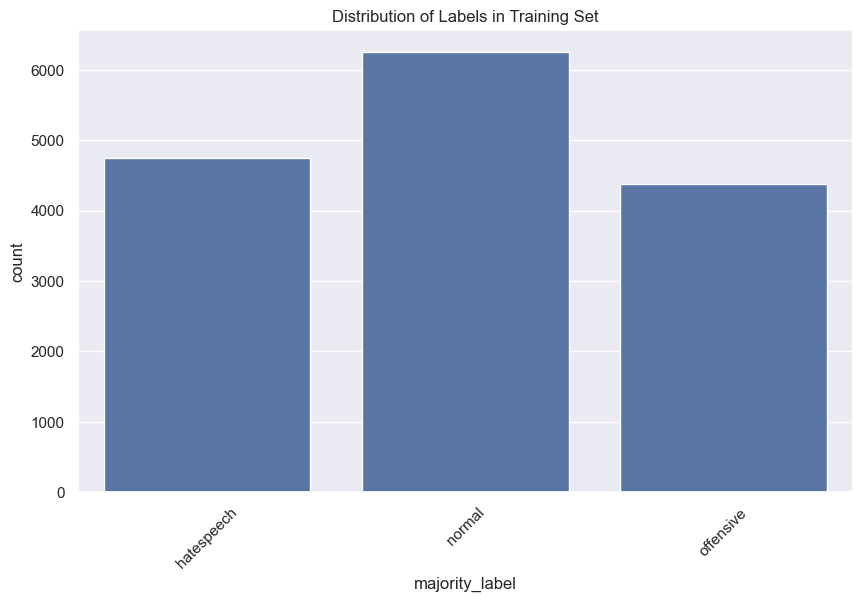


Label distribution (%):
 majority_label
normal        40.635767
hatespeech    30.865241
offensive     28.498992
Name: proportion, dtype: float64


In [8]:
# Create a mapping dictionary
label_mapping = {0: 'hatespeech', 1: 'normal', 2: 'offensive'}

# Update the majority_label column with the new labels
df['majority_label'] = df['majority_label'].map(label_mapping)

# Plot the updated label distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='majority_label', order=['hatespeech', 'normal', 'offensive'])  # Order the labels as desired
plt.title('Distribution of Labels in Training Set')
plt.xticks(rotation=45)
plt.show()

# Print label percentages
label_dist = df['majority_label'].value_counts(normalize=True) * 100
print("\nLabel distribution (%):\n", label_dist)

## 4. Text Length Analysis

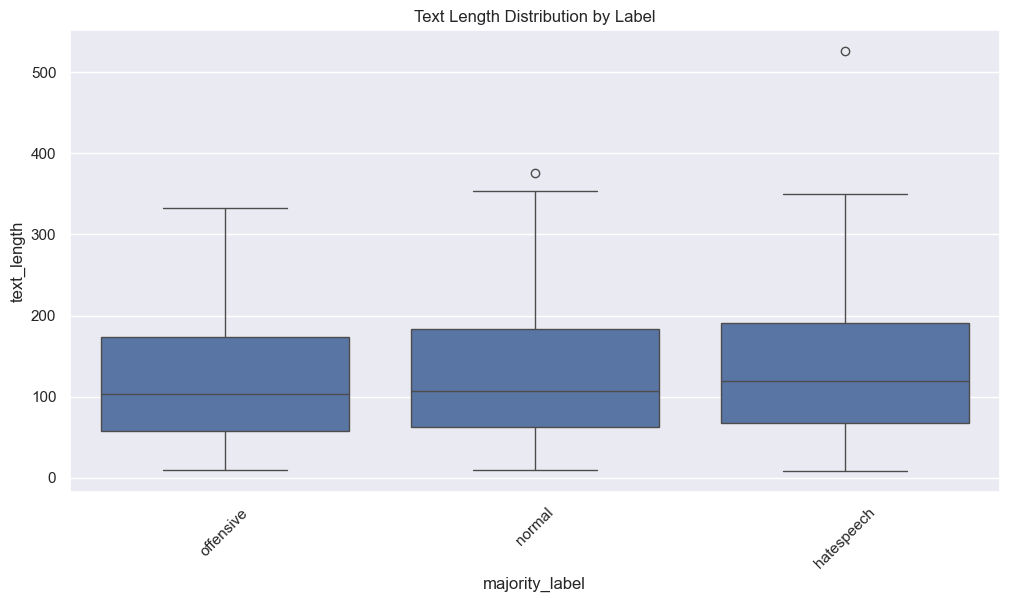


Text Length Statistics by Label:
                 count        mean        std   min   25%    50%     75%  \
majority_label                                                             
hatespeech      4748.0  132.407751  78.247487   8.0  67.0  119.0  190.25   
normal          6251.0  126.299472  78.395142  10.0  62.0  107.0  183.00   
offensive       4384.0  120.546533  76.471472   9.0  58.0  103.0  174.00   

                  max  
majority_label         
hatespeech      526.0  
normal          376.0  
offensive       333.0  


In [9]:
# Add text length
df['text_length'] = df['message'].str.len()

# Plot text length distribution by label
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='majority_label', y='text_length')
plt.title('Text Length Distribution by Label')
plt.xticks(rotation=45)
plt.show()

# Statistical summary by label
print("\nText Length Statistics by Label:")
print(df.groupby('majority_label')['text_length'].describe())

## 5. Common Words Analysis

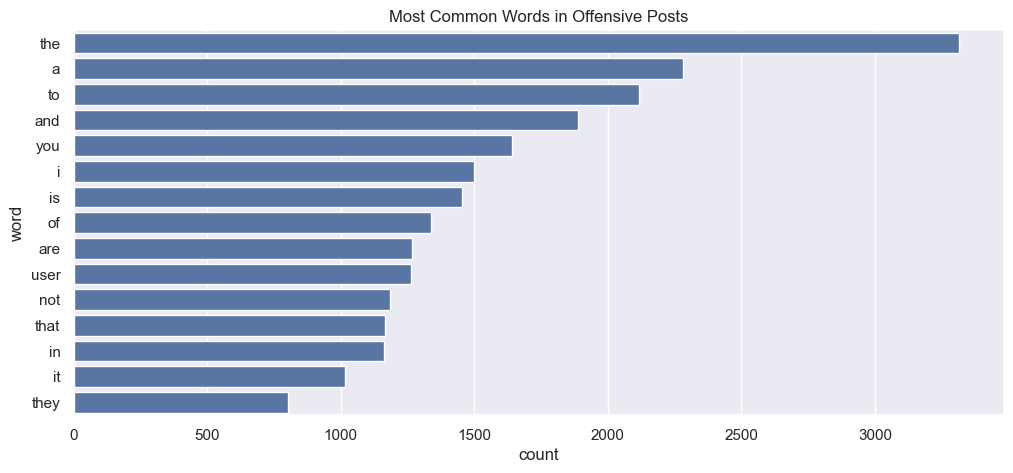

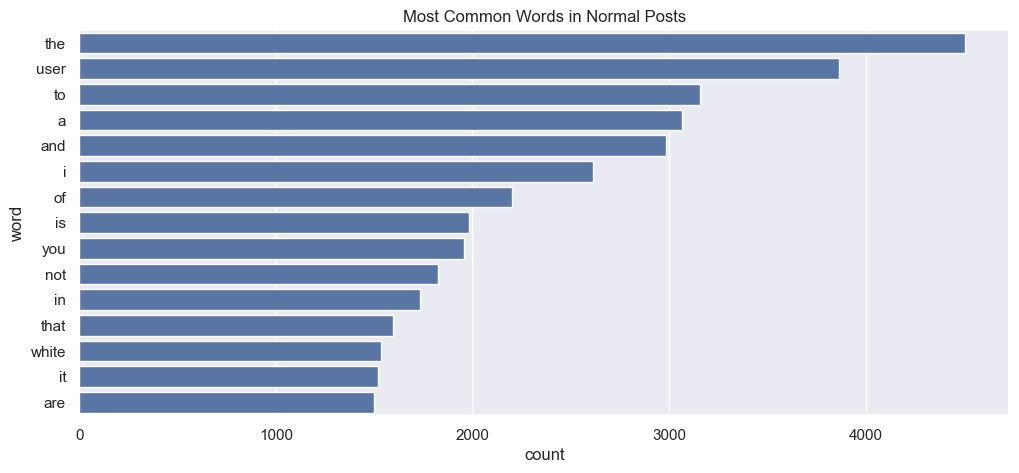

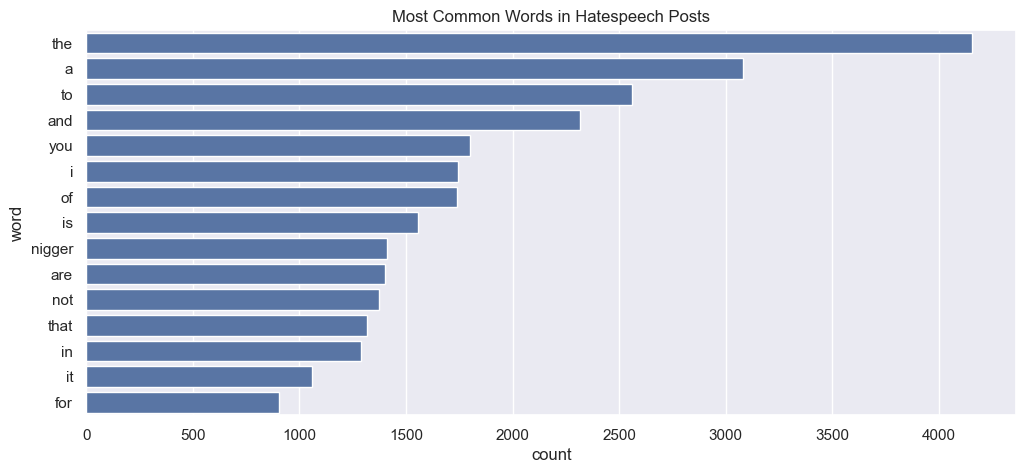

In [10]:
from collections import Counter
import re

def get_common_words(text_series, n=20):
    # Combine all text
    text = ' '.join(text_series.astype(str))
    # Convert to lowercase and split into words
    words = re.findall(r'\w+', text.lower())
    # Get most common words
    return Counter(words).most_common(n)

# Analyze common words by label
for label in df['majority_label'].unique():
    words = get_common_words(df[df['majority_label'] == label]['message'])
    
    plt.figure(figsize=(12, 5))
    word_df = pd.DataFrame(words, columns=['word', 'count'])
    sns.barplot(data=word_df.head(15), x='count', y='word')
    plt.title(f'Most Common Words in {label.capitalize()} Posts')
    plt.show()

In [11]:
df.head()

,id,majority_label,message,text_length
0,23107796_gab,offensive,u really think i would not have been raped by ...,151
1,9995600_gab,offensive,the uk has threatened to return radioactive wa...,175
2,1227920812235051008_twitter,offensive,if english is not imposition then hindi is als...,106
3,1204931715778543624_twitter,offensive,no liberal congratulated hindu refugees post c...,73
4,1179102559241244672_twitter,offensive,he said bro even your texts sound redneck what...,88


In [12]:
df.drop(['id', 'text_length'], axis=1, inplace=True)

In [13]:
# Create the processed directory if it doesn't exist
import os
os.makedirs('../datasets/processed', exist_ok=True)

In [14]:
# Save processed data
df.to_csv('../datasets/processed/hatexplain_relevant_data.csv', index=False)